# PREDICTING BITE FORCE FROM BAT MORPHOMETRICS
## XGBoost Regressor vs Linear Regression


### Import Packages and Read In Data

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
# Read file
bat_df= pd.read_csv("Bat_bite.csv")

### Explore Data

In [3]:
#Checking file
bat_df.head()
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          789 non-null    object 
 1   Band No.      781 non-null    object 
 2   Species Name  789 non-null    object 
 3   Family        789 non-null    object 
 4   Sex           789 non-null    object 
 5   Age           789 non-null    object 
 6   Rep           364 non-null    object 
 7   FA            789 non-null    float64
 8   Weight        789 non-null    float64
 9   Head Height   789 non-null    float64
 10  Head Length   789 non-null    float64
 11  Head Width    789 non-null    float64
 12  CM3           788 non-null    float64
 13  pl dist       789 non-null    float64
 14  1             789 non-null    float64
 15  2             789 non-null    float64
 16  3             789 non-null    float64
 17  4             788 non-null    float64
 18  5             786 non-null    

In [4]:
# Describing features
bat_df.describe()

,FA,Weight,Head Height,Head Length,Head Width,CM3,pl dist,1,2,3,4,5,6,MaxBF,MaxBF in N
count,789.000000,789.000000,789.000000,789.000000,789.000000,788.000000,789.000000,789.000000,789.000000,789.000000,788.000000,786.000000,785.000000,789.000000,789.000000
mean,47.325729,14.812966,11.074246,21.153105,12.474043,7.935470,3.589987,56.647909,55.793916,55.825349,56.081840,55.942366,56.467134,61.847022,6.208390
std,14.873248,17.981486,3.283136,5.754363,3.909114,2.386556,1.024516,64.039896,62.225216,62.616316,62.774342,62.601386,63.410709,68.507928,6.883939
min,25.500000,2.250000,5.400000,11.000000,6.400000,4.600000,2.500000,4.500000,3.600000,4.800000,3.500000,4.500000,2.900000,5.500000,0.390000
25%,40.900000,7.000000,9.000000,17.500000,10.100000,6.300000,3.000000,20.400000,19.600000,19.400000,19.600000,19.625000,19.500000,22.300000,2.150000
50%,44.800000,9.250000,10.200000,19.800000,11.600000,7.450000,3.500000,37.100000,36.100000,36.000000,35.900000,36.700000,36.300000,40.400000,3.940000
75%,50.000000,14.500000,12.000000,23.800000,13.500000,9.000000,4.000000,57.500000,56.900000,54.900000,56.500000,56.300000,57.500000,62.500000,6.610000
max,88.600000,216.000000,30.000000,47.500000,35.500000,14.700000,6.500000,343.000000,316.000000,304.000000,324.000000,320.000000,328.000000,343.000000,33.970000


### Divide Data Into Features and Target

Here we will only select the columns of morphometric data we are interested in. 'FA' is length of forearm. 'MaxBF in N ' is the maximum bite force per individual measured in Newtons.

In [5]:
# Divide data as features and target
X = bat_df[bat_df.columns[7:12]]
y = bat_df['MaxBF in N ']

#Check feature variables
X.head()

,FA,Weight,Head Height,Head Length,Head Width
0,27.0,2.5,7.8,13.2,8.4
1,46.0,8.5,11.8,20.8,12.3
2,27.9,2.5,6.7,13.0,7.5
3,28.2,2.5,7.9,13.8,8.4
4,41.3,10.0,11.2,20.2,13.5


### EDA

In [6]:
#Check correlation between features and target
corr_values = X.corrwith(y)
print("Correlation With Bite Force")
print(abs(corr_values).sort_values(ascending=False))

Correlation With Bite Force
FA             0.868461
Head Length    0.840066
Head Height    0.832934
Head Width     0.824312
Weight         0.719248
dtype: float64


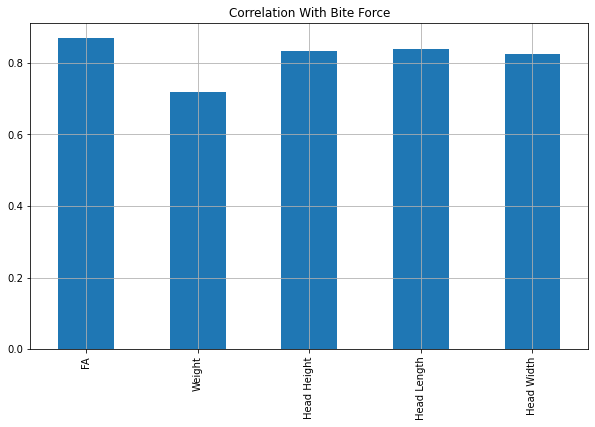

In [7]:
#Plot correlations between features and target
X.corrwith(y).plot(kind='bar',
                           grid=True, 
                           figsize=(10, 6),
                           title="Correlation With Bite Force");

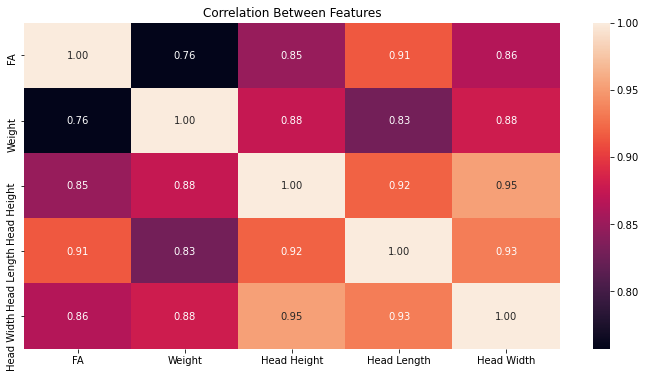

In [8]:
# Check for correlations between features
corr =X.corr()
fig, ax =plt.subplots(figsize =(12,6))
ax  = sns.heatmap(corr,annot =True,fmt = ".2f")
ax.set_title('Correlation Between Features');

### Split Into Train and Test

In [9]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

### Fit a XGBoost Tree Model

In [10]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
                  
# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
pred = xg_reg.predict(X_test) 

# Compute the rmse: rmse
rmse=np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  4.303472


 #### Convert  Dataset Into Optimized Data Structure

In [11]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

#### Cross Validation

In [12]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=68)
print(cv_results.head())
print('\n Best test round and RMSE: ',(cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         8.139658        0.144685        8.173138       0.292987
1         7.424313        0.133874        7.460879       0.274299
2         6.781267        0.120776        6.825219       0.263331
3         6.212015        0.110067        6.260681       0.250388
4         5.702325        0.097601        5.755303       0.241254

 Best test round and RMSE:  330    2.048239
Name: test-rmse-mean, dtype: float64


#### Plotting Feature Importance

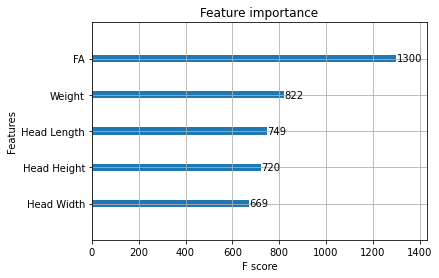

In [13]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix=xgb.DMatrix(X,y)

# Create the parameter dictionary: params
params={"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg=xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=330)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

### Fit a Linear Regression Model

In [14]:
# Instantiate model
model = LinearRegression()

#Fit model
model.fit(X_train, y_train)
#Print model score
r_sq = model.score(X, y)
print('Coefficient of determination(R-squared):', r_sq)

#Print model attributes- intercept and coefficients
print('Intercept:', model.intercept_)
print(pd.DataFrame(model.coef_, X.columns, columns = ['Coeff']))

Coefficient of determination(R-squared): 0.7878482699854533
Intercept: -15.79040705799526
                Coeff
FA           0.258229
Weight      -0.041489
Head Height  0.814878
Head Length  0.041961
Head Width   0.031598


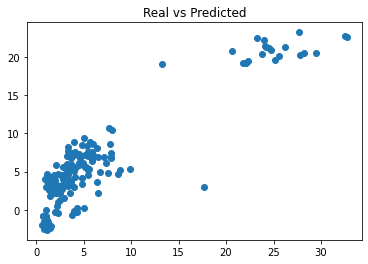

In [15]:
# Predict the targets of the test set
predictions = model.predict(X_test)

#Plot known vs predictions
plt.title('Real vs Predicted')
plt.scatter(y_test, predictions);


### Metrics of Performance of Regression Model

In [16]:
#Metrics for performance of regression model
#MAE
MAE = metrics.mean_absolute_error(y_test, predictions)
#MSE
MSE = metrics.mean_squared_error(y_test, predictions)
#RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("MAE= ",MAE, '\n',"MSE= ",MSE, '\n',"RMSE= ",RMSE)

MAE=  2.467772619042409 
 MSE=  10.25957546361885 
 RMSE=  3.2030572057986806


### Summary Results:
A boosted tree regression model had the lowest RMSE at 2.048 compared to a linear regression with a RMSE of 3.203. The length of arm was the most important feature in predicting bite force of the bats in this data set, with weight coming in second. As all the features were correlated with each other, no one variable could or should be dropped. 
Body measurements make for ideal estimates of the measurement of bite force in bats, given this data.